In [1]:
import matplotlib
# Temporary compatibility patch for SHAP + Matplotlib 3.9+
if not hasattr(matplotlib.RcParams, "_get"):
    matplotlib.RcParams._get = dict.get

/usr/local/lib/python3.10/pickle.py:1718: UserWarning: [00:18:35] WARNING: /workspace/src/collective/../data/../common/error_msg.h:83: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)
['road_event_id', 'road_name', 'duration_hr', 'vehicle_impact', 'latitude', 'longitude', 'crash_count', 'avg_severity', 'avg_distance_km', 'avg_visibility_mi', 'avg_precip_in', 'avg_temp_F', 'avg_wind_mph', 'high_risk']


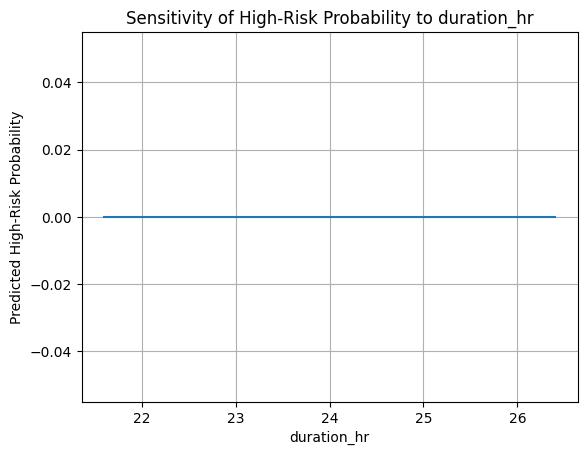

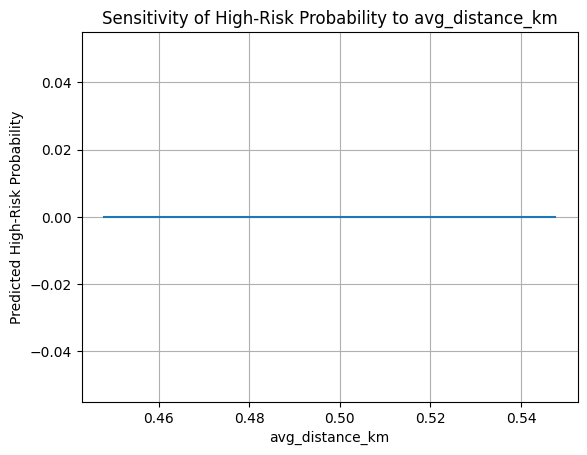

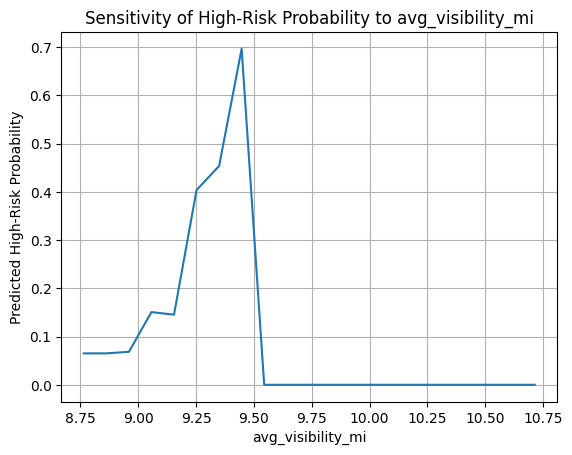

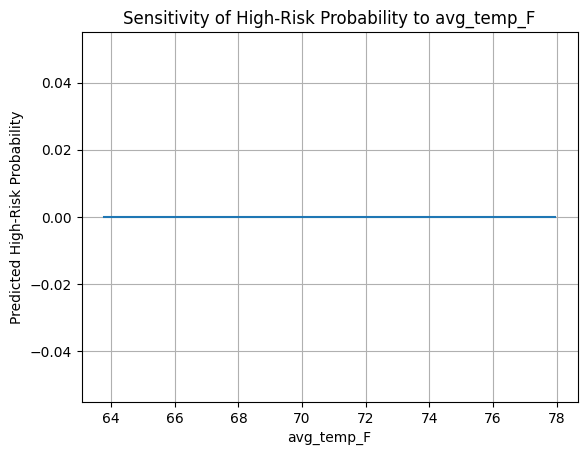

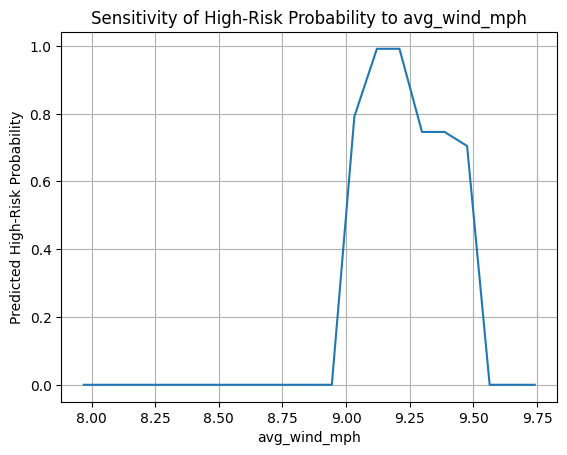

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

model = joblib.load("/work/siads_699_mads_capstone/data/models/xgb_final_calibrated.pkl")
df = pd.read_csv("/work/siads_699_mads_capstone/data/models/workzone_features.csv")
print(df.columns.tolist())
features = ["duration_hr", "avg_distance_km", "avg_visibility_mi", "avg_temp_F", "avg_wind_mph"]
baseline = df[features].median().to_dict()
def one_way_sensitivity(model, baseline, feature, delta=0.1, n_steps=21):
    base_df = pd.DataFrame([baseline])
    feature_values = np.linspace(baseline[feature] * (1 - delta),
        baseline[feature] * (1 + delta),
        n_steps
    )
    preds = []
    for val in feature_values:
        temp_df = base_df.copy()
        temp_df[feature] = val
        pred = model.predict_proba(temp_df)[:, 1][0]
        preds.append(pred)

    plt.plot(feature_values, preds, label=f"{feature}")
    plt.title(f"Sensitivity of High-Risk Probability to {feature}")
    plt.xlabel(feature)
    plt.ylabel("Predicted High-Risk Probability")
    plt.grid(True)
    plt.show()

for f in features:
    one_way_sensitivity(model, baseline, f)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=609edc76-98cb-4265-b05f-b8bb14bd7d7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>